# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows us that the charges distribution is heavily skewed to the right, with most values being less than $10000.  Calculating the mean and standard deviation is not appropriate for such a distribution. The mean would be heavily skewed by the data on the right end tail, and the standard deviation is best for normal, symmetric distributions. 

Text(0.5, 1.0, 'Frequency Distribution of Hospital Charges')

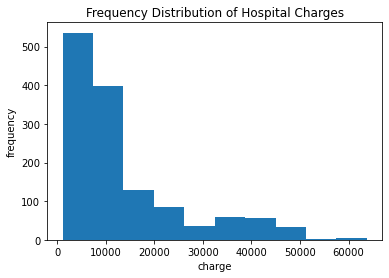

In [27]:
plt.hist(medical['charges'])
plt.xlabel('charge')
plt.ylabel('frequency')
plt.title('Frequency Distribution of Hospital Charges')

In [34]:
print('Mean: ' + str(np.mean(medical['charges'])))
print('Standard Deviation: ' + str(np.std(medical['charges'],ddof=1)))

Mean: 13270.422265141257
Standard Deviation: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ As discussed above, the mean and standard deviations of the entire hospital dataset are not very meaningful and canont help us to answer the administrator's question.  
We need to employ bootstrapping to estimate if the actual average charge has fallen below 12,000 or not.  We will sample by replacement (sample size will be 1,338, the size of the total dataset), and repeat this procedure 1,000 times.  The means of each of the 1,000 samples will have a normal distribution from which we can draw conclusions.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate confidence interval is a __one-sided__ interval.  The administrator is only concerned about the mean being below a threshold.  Therefore, we should make an upper one-sided 95% confidence interval, and see if the administrator's $12,000 benchmark is contained in the interval or not.

The mean of our 1000 samples is: 13248.44972669379
The standard deviation of our 1000 samples is: 336.3781354567027


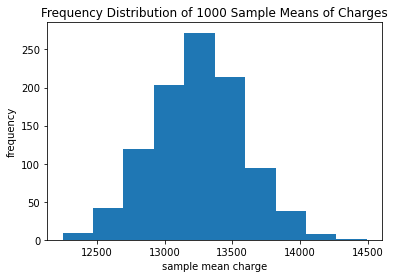

In [57]:
#Bootstrapping: 1,000 resamples

import random

def bootstrapping(data,reps,interest):
    sample_means = [0]*reps
    for i in range(reps):
        sample = [0]*len(data)
        for j in range(len(data)):
            sample[j] = data[interest][random.randint(0, len(data)-1)]
        sample_means[i] = np.mean(sample)
    return sample_means

sample_means = bootstrapping(medical,1000,'charges')

plt.hist(sample_means)
plt.xlabel("sample mean charge")
plt.ylabel("frequency")
plt.title("Frequency Distribution of 1000 Sample Means of Charges")
mean_of_resamples = np.mean(sample_means)
stdev_of_res = np.std(sample_means,ddof=1)
print("The mean of our 1000 samples is: " + str(mean_of_resamples))
print("The standard deviation of our 1000 samples is: " + str(stdev_of_res))

In [58]:
#Confidence Interval

CI = [mean_of_resamples + t.ppf(0.05,df=1337)*stdev_of_res, np.inf]
print(CI)

[12694.773295466355, inf]


12,000 is not in our 95 percent confidence interval, which bodes well for us.  We can be 95 percent confident that the true mean of charges is in the above interval, and therefore also above 12,000.  Based on this finding, the administrator should not be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null Hypothesis: There is no significant difference between charges for people with insurance and charges for people without insurance.  The difference between the two means is 0.

Altenrative Hypothesis: There is a significant difference between charges for people with insurance and charges for people without insurance.  The difference between the two means is not equal to 0.

This t-test is assuming __equal__ variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [110]:
#Separate the insurance patients from the non-insurance patients

insurance_patients = medical[medical['insuranceclaim']==1].reset_index()
no_insurance_patients = medical[medical['insuranceclaim']==0].reset_index()


In [118]:
#Bootstrap on both crowds

ins_samples = bootstrapping(insurance_patients,1000,'charges')
no_ins_samples = bootstrapping(no_insurance_patients,1000,'charges')

mean_ins_samp = np.mean(ins_samples)
stdev_ins_samp = np.std(ins_samples,ddof=1)
print("The mean of our 1000 insurance samples is: " + str(mean_ins_samp))
print("The standard deviation of our 1000 insurance samples is: " + str(stdev_ins_samp))

mean_no_ins_samp = np.mean(no_ins_samples)
stdev_no_ins_samp = np.std(no_ins_samples,ddof=1)
print("The mean of our 1000 non-insurance samples is: " + str(mean_no_ins_samp))
print("The standard deviation of our 1000 non-insurance samples is: " + str(stdev_no_ins_samp))

The mean of our 1000 insurance samples is: 16448.69250447126
The standard deviation of our 1000 insurance samples is: 499.0577787890452
The mean of our 1000 non-insurance samples is: 8822.26914869766
The standard deviation of our 1000 non-insurance samples is: 265.39645252973156


In [119]:
#Manual Hypothesis Test
pooled_stdev = np.sqrt(((len(insurance_patients)-1)*(stdev_ins_samp ** 2) + (len(no_insurance_patients)-1)*(stdev_no_ins_samp ** 2))/(len(medical)-2))
print("The pooled standard deviation is: " + str(pooled_stdev))
t_stat = (mean_ins_samp - mean_no_ins_samp)/(pooled_stdev * np.sqrt((1/len(insurance_patients) + 1/len(no_insurance_patients))))
print("The t-statistic is: " + str(t_stat))
print("p-value is very close to 0.")

The pooled standard deviation is: 418.3166121099789
The t-statistic is: 328.56032116552717
p-value is very close to 0.


In [124]:
import scipy.stats
scipy.stats.ttest_ind(ins_samples,no_ins_samples)


Ttest_indResult(statistic=426.6675313320955, pvalue=0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ An equivalent method for performing a z-test was not found in the documentation.  This could possibly speak to the relative rarity of situations that use a z-test and not a t-test.  T-tests can be used in situations with unknown population mean and variance, which is more common than situations with known variance where z-tests can be used.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test